## Lab 1:분석 도전

- midwest.csv는 미국 동북중부(East North Central States) 437개 지역의 인구 통계 정보를 담고 있음
- 지역별 아시아계 인구 비율이 높은 지역을 알아보려고 함

1. midwest.csv를 데이터 프레임으로 읽어오기
2. midwest 데이터의 행과 열의 갯수 파악
3. 컬럼(변수)의 이름과 변수의 타입 파악
- poptotal : 해당 지역의 총 인구 수
- popasian : 해당 지역의 아시아계 인구 수

In [1]:
import pandas as pd
midwest = pd.read_csv('midwest.csv')
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [2]:
#데이터 행과 열
midwest.shape

(437, 28)

In [3]:
#컬럼의 이름과 변수의 타입 파악
midwest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   poptotal              437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   popasian              437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

poptotal 변수를 total로, popasian 변수를 asian으로 수정하시오

In [4]:
midwest = midwest.rename(columns={'poptotal':'total','popasian':'asian'})
midwest.head()

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


total, asin 변수를 활용하여 '전체 인구 대비 아시아 인구 백분율'을 구하여 변수 rate를 저장하고 히스토그램으로 분포 살펴보기

In [5]:
midwest['rate'] = (midwest['asian'] / midwest['total'])*100
midwest[['county','state','total','asian','rate']].head()

,county,state,total,asian,rate
0,ADAMS,IL,66090,249,0.376759
1,ALEXANDER,IL,10626,48,0.451722
2,BOND,IL,14991,16,0.106731
3,BOONE,IL,30806,150,0.486918
4,BROWN,IL,5836,5,0.085675


<Axes: ylabel='Frequency'>

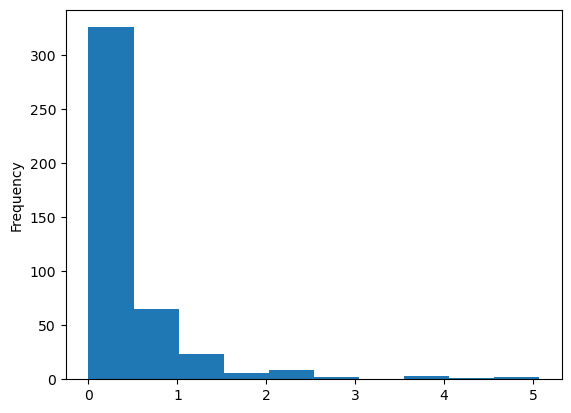

In [6]:
#전체 인구 대비 아시아 인구 백분율 빈도수 확인
midwest['rate'].plot.hist()

아시아 인구 전체 백분율을 구하고 평균을 초과하면 'large' 그 외에는 'samll'을 부여하는 변수 group 생성

In [7]:
import numpy as np
midwest['group'] = np.where(midwest['rate']>midwest['rate'].mean(),'large','samll'
)
midwest[['county','state','total','asian','rate','group']]

,county,state,total,asian,rate,group
0,ADAMS,IL,66090,249,0.376759,samll
1,ALEXANDER,IL,10626,48,0.451722,samll
2,BOND,IL,14991,16,0.106731,samll
3,BOONE,IL,30806,150,0.486918,samll
4,BROWN,IL,5836,5,0.085675,samll
...,...,...,...,...,...,...
432,WAUKESHA,WI,304715,2699,0.885746,large
433,WAUPACA,WI,46104,92,0.199549,samll
434,WAUSHARA,WI,19385,43,0.221821,samll
435,WINNEBAGO,WI,140320,1728,1.231471,large


In [8]:
#group 값에 따른 빈도수 출력
midwest['group'].value_counts()

samll    318
large    119
Name: group, dtype: int64

'large'와 'samll' 해당 지역이 얼마나 많은지 빈도표와 막대 그래프를 만드시오

<Axes: >

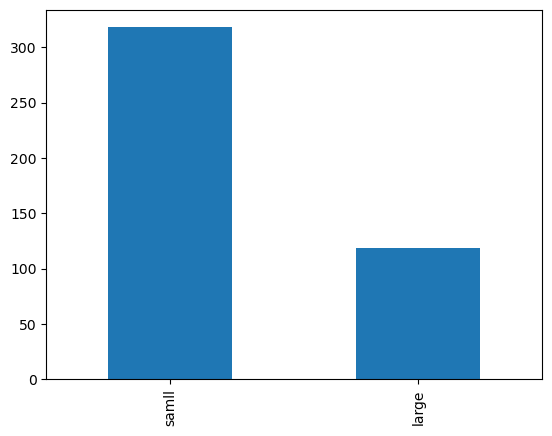

In [9]:
count_group = midwest['group'].value_counts()
count_group.plot.bar()